In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from torchAA import torchAA
# from torchNMF import NMF
#from estTimeAutCor import estTimeAutCor
from TimeCor import estT
#import pandas as pd
def shift_dataset(W, H, tau):
    # Get half the frequencies
    Nf = H.shape[1] // 2 + 1
    # Fourier transform of S along the second dimension
    Hf = np.fft.fft(H, axis=1)
    # Keep only the first Nf[1] elements of the Fourier transform of S
    Hf = Hf[:, :Nf]
    # Construct the shifted Fourier transform of S
    Hf_reverse = np.fliplr(Hf[:, 1:Nf - 1])
    # Concatenate the original columns with the reversed columns along the second dimension
    Hft = np.concatenate((Hf, np.conj(Hf_reverse)), axis=1)
    f = np.arange(0, M) / M
    omega = np.exp(-1j * 2 * np.pi * np.einsum('Nd,M->NdM', tau, f))
    Wf = np.einsum('Nd,NdM->NdM', W, omega)
    # Broadcast Wf and H together
    Vf = np.einsum('NdM,dM->NM', Wf, Hft)
    V = np.fft.ifft(Vf)
    return V
def generateTauWMatrix(TauW, N2):
    TauWMatrix = np.zeros((TauW.shape[0], N2))

    for d in range(TauW.shape[0]):
        TauWMatrix[d, 0:int(TauW[d, 1])] = 1
        TauWMatrix[d, N2+int(TauW[d, 0]):N2] = 1

    return TauWMatrix

In [5]:
N, M, d = 5, 10000, 3
Fs = 1000  # The sampling frequency we use for the simulation
t0 = 10    # The half-time interval we look at
t = np.arange(-t0, t0, 1/Fs)  # the time samples
f = np.arange(-Fs/2, Fs/2, Fs/len(t))  # the corresponding frequency samples

def gauss(mu, s, time):
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-1/2*((time-mu)/s)**2)

W = np.random.dirichlet(np.ones(d), N)

shift = 400
# Random gaussian shifts
tau = np.random.randint(-shift, shift, size=(N, d))

mean = [100, 400, 800]
std = [10, 20, 7]
t = np.arange(0, 10000, 1)

H = np.array([gauss(m, s, t) for m, s in list(zip(mean, std))])

X = shift_dataset(W, H, tau)


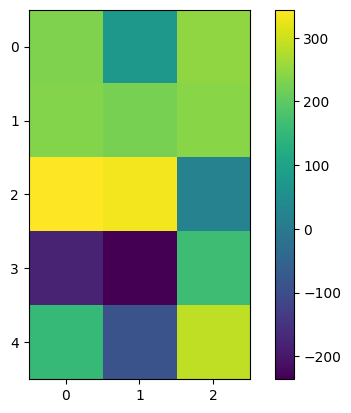

In [6]:
plt.imshow(tau)
plt.colorbar()
plt.show()

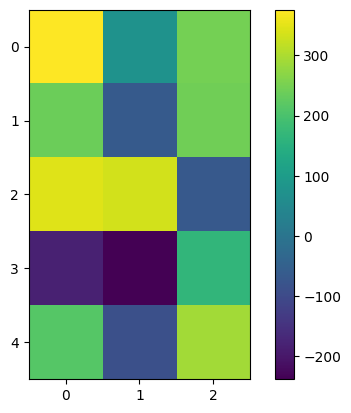

In [8]:
Xf = np.fft.fft(X)
A = W
Sf = np.fft.fft(H)
krSf = np.conj(Sf)
krf = np.arange(0, X.shape[1]) / X.shape[1]
Nf = X.shape
N = X.shape
T = np.zeros((N[0],3))
w = np.ones(X.shape[1])
TauW = np.ones((3, 1))*np.array([-2000,2000])
TauWMatrix = generateTauWMatrix(TauW, N[1])
# plt.plot(TauWMatrix.T)
# plt.show()

SST = np.sum(X**2)
sigma_sq = SST / (11*np.prod(N) -X.shape[0]*X.shape[1])
Lambda = np.ones(3)*sigma_sq
T = estT(X,W,H)
plt.imshow(T)
plt.colorbar()
plt.show()